In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from matplotlib import rcParams


In [111]:
files_path = '/Users/EF/Desktop/WindWard/Features'
df_name = 'all_activities.csv.gz'

In [112]:
df = pd.read_csv(os.path.join(files_path, df_name), compression='gzip')

/Users/EF/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [118]:
df.head()

,_id,vesselId,startDate,endDate,createdDate,type,confidence,isInProgress,firstBlip,lastBlip,...,vessel_size,vessel_age,vessel_draught,vessel_size_category,vessel_class_calc_updated,isOutlier,polygonId,polygonType,firstBlip_in_polygon,lastBlip_in_polygon
0,601e7946a3227d36f23a0d35,5905c78029eec5581e773593,2021-02-06 11:11:02.000,2021-02-06 11:22:58.000,2021-02-06 12:29:43.110,LOW_SPEED_MOORED,0.75,False,"{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...","{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...",...,101.0,11.0,2.3,big,Passenger,NaN,NaN,NaN,True,True
1,601e5928d8d0c30136ab358b,5905c78029eec5581e773593,2021-02-06 08:54:00.000,2021-02-06 09:09:11.000,2021-02-06 10:50:03.622,LOW_SPEED_MOORED,0.75,False,"{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...","{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...",...,101.0,11.0,2.3,big,Passenger,NaN,NaN,NaN,True,True
2,601df701782202ec18ba5ef8,5905c78029eec5581e773593,2021-02-06 01:55:13.000,2021-02-06 07:40:02.000,2021-02-06 08:17:12.001,LOW_SPEED_MOORED,0.90,False,"{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...","{'sog': 2.0, 'th': 128.0, 'geometry': {'type':...",...,101.0,11.0,2.3,big,Passenger,NaN,NaN,NaN,True,True
3,601dda8341c756c06a092e8f,5905c78029eec5581e773593,2021-02-05 23:53:39.000,2021-02-06 00:00:35.000,2021-02-06 05:20:13.845,LOW_SPEED_MOORED,0.75,False,"{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...","{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...",...,101.0,11.0,2.3,big,Passenger,NaN,NaN,NaN,True,True
4,601d718299fd15ff2269fb6f,5905c78029eec5581e773593,2021-02-05 16:25:38.000,2021-02-05 16:28:07.000,2021-02-06 05:20:13.845,LOW_SPEED_MOORED,0.75,False,"{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...","{'sog': 0.0, 'th': 360.0, 'geometry': {'type':...",...,101.0,11.0,2.3,big,Passenger,NaN,NaN,NaN,True,True


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7788073 entries, 0 to 7788072
Data columns (total 39 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   _id                         object 
 1   vesselId                    object 
 2   startDate                   object 
 3   endDate                     object 
 4   createdDate                 object 
 5   type                        object 
 6   confidence                  float64
 7   isInProgress                bool   
 8   firstBlip                   object 
 9   lastBlip                    object 
 10  duration                    float64
 11  previousPort                object 
 12  enrichers                   object 
 13  nextPort                    object 
 14  firstBlip_lng               float64
 15  firstBlip_lat               float64
 16  lastBlip_lng                float64
 17  lastBlip_lat                float64
 18  geometry                    object 
 19  firstBlip_polygon_id 

## get polygon type

In [198]:
# get polygon type
polygons_info = pd.DataFrame(df.loc[:,'polygonId'])

In [199]:
polygons_info.head()

,polygonId
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [193]:
polygons_df = pd.read_json('Data/polygons.json', orient='index')

In [194]:
polygons_df['areaType'] = [d.get('areaType') for d in polygons_df.properties]

In [203]:
polygons_df._id

5358f8aab68ca120a07d4f3d    <not serializable>
5358f8aab68ca120a07d4f49    <not serializable>
5358f8aab68ca120a07d4f4a    <not serializable>
5358f8aab68ca120a07d4f62    <not serializable>
5358f8aab68ca120a07d4f3b    <not serializable>
                                   ...        
5a646f452703036ab994f8cf    <not serializable>
5a646fe8c5b9bd6ae8bcb3d1    <not serializable>
5b28da24aa701d6eaeb06ea1    <not serializable>
5cefde19096b6b646460626c    <not serializable>
5cff70a72c71dc66dcabe251    <not serializable>
Name: _id, Length: 18133, dtype: object

In [202]:
polygons_info = polygons_info.merge(polygons_df['areaType'], left_on='polygonId', right_on='_id').drop('_id', axis=1)

KeyError: '_id'

In [160]:
cols = ['type', 'firstBlip_polygon_id', 'lastBlip_polygon_id', 'vessel_class_calc_updated', 'vessel_deadweight', 'vessel_draught', 'vessel_size_category' ]

In [161]:
df_for_analysis = df.loc[:,cols]

In [162]:
df_for_analysis.shape

(7788073, 7)

In [163]:
df_for_analysis['type'].unique()

array(['LOW_SPEED_MOORED', 'LOW_SPEED_DRIFTING', 'PORT_CALL',
       'LOW_SPEED_ANCHORED'], dtype=object)

In [164]:
df_for_analysis['activity'] = df_for_analysis['type'].replace({'LOW_SPEED_MOORED': 'Mooring',
                                                              'LOW_SPEED_DRIFTING': 'Drifting',
                                                              'PORT_CALL': 'Port Calls',
                                                              'LOW_SPEED_ANCHORED': 'Anchoring'})

In [165]:
df_for_analysis['activity'].unique()

array(['Mooring', 'Drifting', 'Port Calls', 'Anchoring'], dtype=object)

In [167]:
def is_in_polygon_features(df):
    
    df['firstBlip_in_polygon'] = df['firstBlip_polygon_id'].notna()
    
    conditions = [
    (df['firstBlip_in_polygon']==True) & (df['lastBlip_polygon_id'].isna()==True),
    (df['firstBlip_in_polygon']==False)& (df['lastBlip_polygon_id'].isna()==True),
    (df['lastBlip_polygon_id'].isna()==False)
    ]

    choices = ['not_ended', 'False', 'True']
    df['lastBlip_in_polygon'] = np.select(conditions, choices)
    
    print('First_blip:')
    print(df['firstBlip_in_polygon'].value_counts(normalize=True))
    df['firstBlip_in_polygon'].value_counts(normalize=True).plot(kind='bar', color='DarkGreen')
    plt.show()
    print('')
    print('Last_blip:')
    print(df['lastBlip_in_polygon'].value_counts(normalize=True))
    df['lastBlip_in_polygon'].value_counts(normalize=True).plot(kind='bar', color='DarkGreen')
 

First_blip:
True     0.833035
False    0.166965
Name: firstBlip_in_polygon, dtype: float64


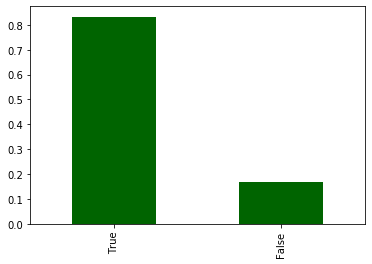


Last_blip:
True         0.842592
False        0.134273
not_ended    0.023135
Name: lastBlip_in_polygon, dtype: float64


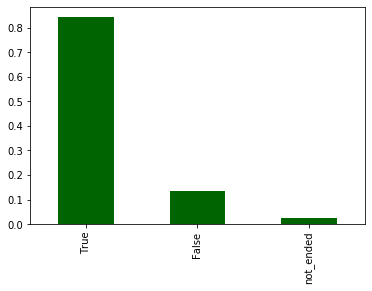

In [168]:
is_in_polygon_features(df_for_analysis)

In [169]:
df_for_analysis.drop(columns=['firstBlip_polygon_id', 'lastBlip_polygon_id', 'type'])

,vessel_class_calc_updated,vessel_deadweight,vessel_draught,vessel_size_category,activity,firstBlip_in_polygon,lastBlip_in_polygon
0,Passenger,864.0,2.3,big,Mooring,True,True
1,Passenger,864.0,2.3,big,Mooring,True,True
2,Passenger,864.0,2.3,big,Mooring,True,True
3,Passenger,864.0,2.3,big,Mooring,True,True
4,Passenger,864.0,2.3,big,Mooring,True,True
...,...,...,...,...,...,...,...
7788068,Cargo,4200.0,4.0,big,Anchoring,False,False
7788069,Cargo,710.0,4.2,medium,Anchoring,True,True
7788070,Cargo,55653.0,8.5,big,Anchoring,True,True
7788071,Cargo,55653.0,8.5,big,Anchoring,True,True


In [173]:
def plot_precentage_in_polygon_ver2(df, col, groupby):
    '''
    df: alon's df for all activities together
    col: firstBlip_in_polygon // lastBlip_in_polygon
    '''

    blip_counts = (df.groupby([groupby])[col]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(col))

    g = sns.catplot(x=groupby,y='percentage',hue=col,kind='bar',data=blip_counts, palette="Greens_d")
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)

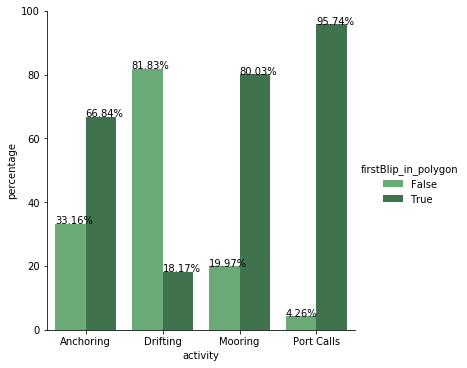

In [174]:
plot_precentage_in_polygon_ver2(df_for_analysis, 'firstBlip_in_polygon', 'activity')

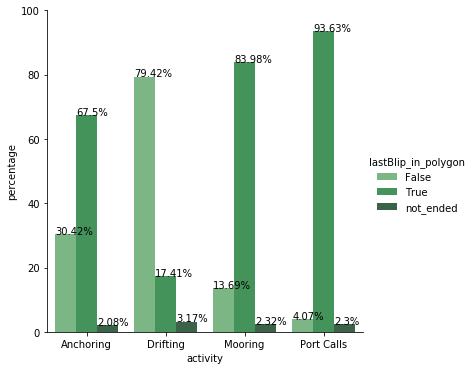

In [175]:
plot_precentage_in_polygon_ver2(df_for_analysis, 'lastBlip_in_polygon', 'activity')

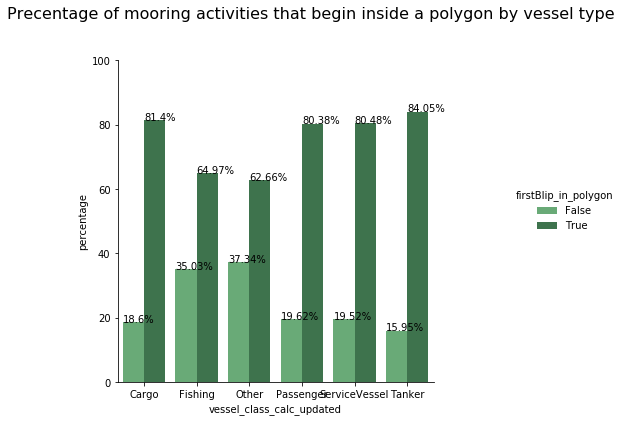

In [183]:
plot_precentage_in_polygon_ver2(df_for_analysis[df_for_analysis['activity']=='Mooring'], 'firstBlip_in_polygon', 'vessel_class_calc_updated')
plt.suptitle('Precentage of mooring activities that begin inside a polygon by vessel type', size=16, y=1.12);      
plt.show()

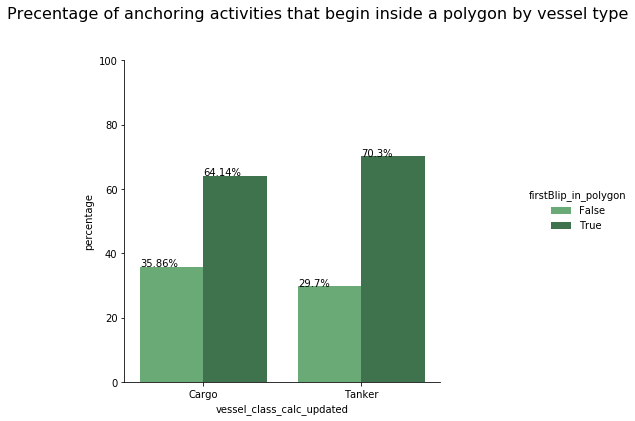

In [184]:
plot_precentage_in_polygon_ver2(df_for_analysis[df_for_analysis['activity']=='Anchoring'], 'firstBlip_in_polygon', 'vessel_class_calc_updated')
plt.suptitle('Precentage of anchoring activities that begin inside a polygon by vessel type', size=16, y=1.12);      
plt.show()

In [187]:
# vrifying there ar indeed no records of anchoring for fishing vessels
df_for_analysis[(df_for_analysis['vessel_class_calc_updated']=='Fishing') & (df_for_analysis['activity']=='Anchoring')]

,type,firstBlip_polygon_id,lastBlip_polygon_id,vessel_class_calc_updated,vessel_deadweight,vessel_draught,vessel_size_category,activity,firstBlip_in_polygon,lastBlip_in_polygon


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


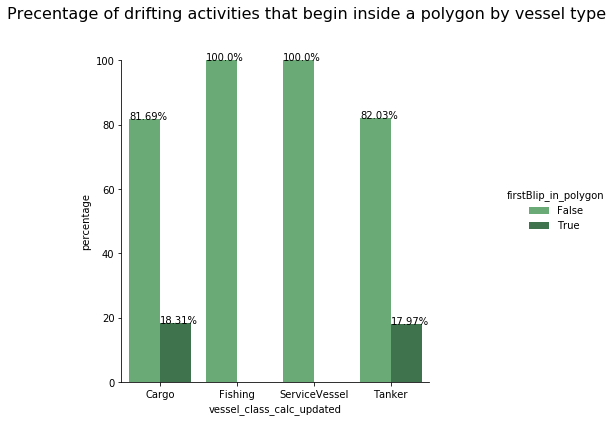

In [185]:
plot_precentage_in_polygon_ver2(df_for_analysis[df_for_analysis['activity']=='Drifting'], 'firstBlip_in_polygon', 'vessel_class_calc_updated')
plt.suptitle('Precentage of drifting activities that begin inside a polygon by vessel type', size=16, y=1.12);      
plt.show()

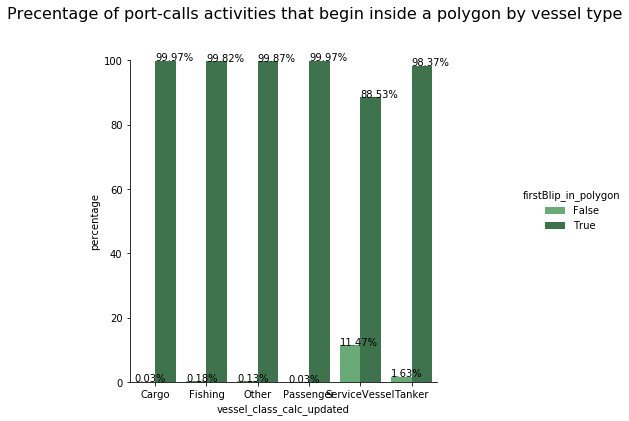

In [186]:
plot_precentage_in_polygon_ver2(df_for_analysis[df_for_analysis['activity']=='Port Calls'], 'firstBlip_in_polygon', 'vessel_class_calc_updated')
plt.suptitle('Precentage of port-calls activities that begin inside a polygon by vessel type', size=16, y=1.12);      
plt.show()

In [188]:
df_for_analysis['polygonType'] = df['polygonType']

In [189]:
df_for_analysis['polygonType'].unique()

array([nan, 'PORT', 'FACILITY_AREA'], dtype=object)

In [ ]:
plot_precentage_in_polygon_ver2(df_for_analysis[df_for_analysis['polygonType']=='Port'], 'firstBlip_in_polygon', 'vessel_class_calc_updated')
plt.suptitle('Precentage of mooring activities that begin inside a polygon by vessel type', size=16, y=1.12);      
plt.show()

In [ ]:
df['activity'].unique

First_blip:
True     0.833035
False    0.166965
Name: firstBlip_in_polygon, dtype: float64


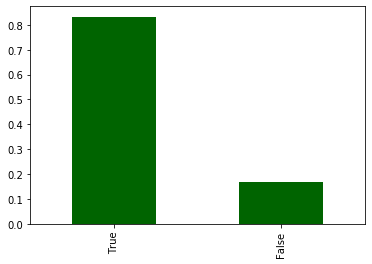


Last_blip:
True         0.842592
False        0.134273
not_ended    0.023135
Name: lastBlip_in_polygon, dtype: float64


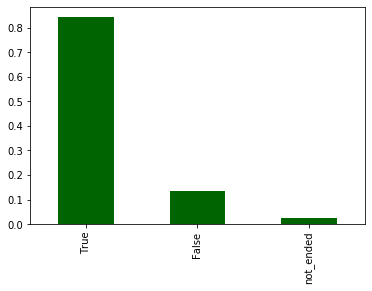

In [115]:
is_in_polygon_features(df)

In [5]:
ACTIVITIES_FILES = ['mooring.csv.gz', 'drifting.csv.gz', 'port_calls.csv.gz', 'anchoring.csv.gz']


In [7]:
mooring_df = pd.read_csv(os.path.join(files_path, 'mooring.csv.gz'), compression='gzip')


First_blip:
True     0.800314
False    0.199686
Name: firstBlip_in_polygon, dtype: float64


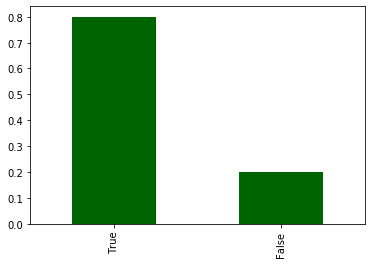


Last_blip:
True         0.839839
False        0.136915
not_ended    0.023247
Name: lastBlip_in_polygon, dtype: float64


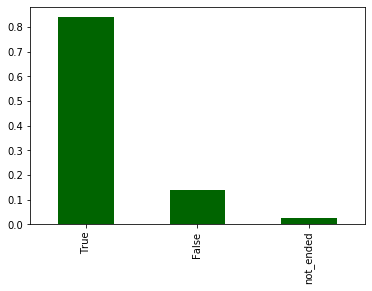

In [83]:
is_in_polygon_features(mooring_df)

In [8]:
drifting_df = pd.read_csv(os.path.join(files_path, 'drifting.csv.gz'), compression='gzip')

First_blip:
False    0.818268
True     0.181732
Name: firstBlip_in_polygon, dtype: float64


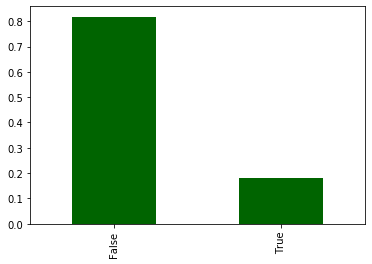


Last_blip:
False        0.794162
True         0.174090
not_ended    0.031748
Name: lastBlip_in_polygon, dtype: float64


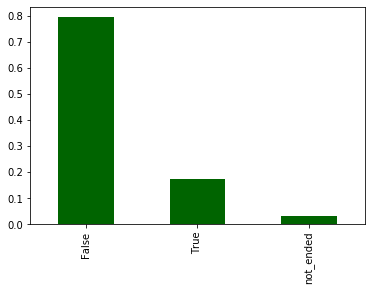

In [84]:
is_in_polygon_features(drifting_df)

In [9]:
anchoring_df = pd.read_csv(os.path.join(files_path, 'anchoring.csv.gz'), compression='gzip')

First_blip:
True     0.668372
False    0.331628
Name: firstBlip_in_polygon, dtype: float64


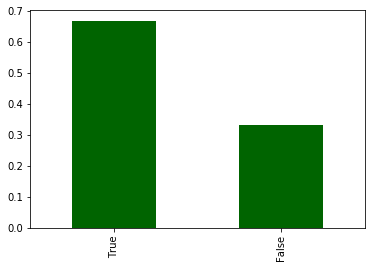


Last_blip:
True         0.675029
False        0.304213
not_ended    0.020758
Name: lastBlip_in_polygon, dtype: float64


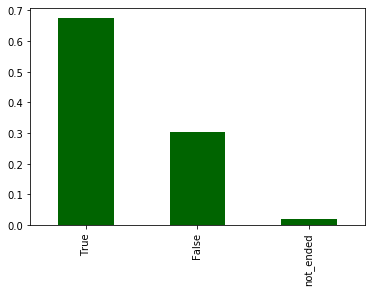

In [85]:
is_in_polygon_features(anchoring_df)

In [10]:
port_calls_df = pd.read_csv(os.path.join(files_path, 'port_calls.csv.gz'), compression='gzip')

First_blip:
True     0.957437
False    0.042563
Name: firstBlip_in_polygon, dtype: float64


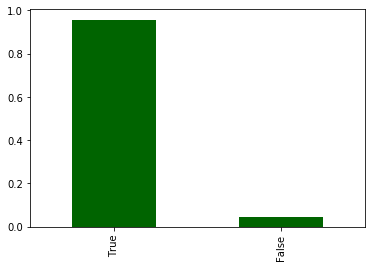


Last_blip:
True         0.936277
False        0.040700
not_ended    0.023023
Name: lastBlip_in_polygon, dtype: float64


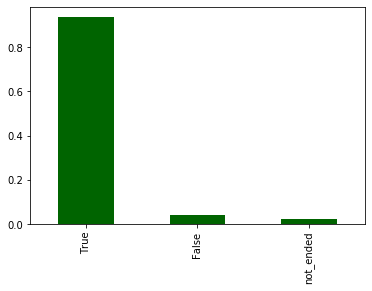

In [86]:
is_in_polygon_features(port_calls_df)

In [136]:
mooring_df.iloc[0]

_id                                              601e7946a3227d36f23a0d35
vesselId                                         5905c78029eec5581e773593
startDate                                         2021-02-06 11:11:02.000
endDate                                           2021-02-06 11:22:58.000
createdDate                                       2021-02-06 12:29:43.110
type                                                     LOW_SPEED_MOORED
confidence                                                           0.75
isInProgress                                                        False
firstBlip               {'sog': 0.0, 'th': 360.0, 'geometry': {'type':...
lastBlip                {'sog': 0.0, 'th': 360.0, 'geometry': {'type':...
duration                                                         0.198889
previousPort                                     57d15450376b25d85e8577a4
enrichers               {'previousNextPort': {'previousPort': ObjectId...
nextPort                              

In [ ]:
is_in_polygon_df = pd.DataFrame()
activities = {'mooring': mooring_df,
              'drifting': drifting_df,
              'anchoring': anchoring_df,
              'port_calls': port_calls_df}

for activity_name, df in activities.items():
    d = df.loc[:, ['firstBlip_in_polygon', 'lastBlip_in_polygon']]
    d['activity'] = activity_name    
    is_in_polygon_df = is_in_polygon_df.append(d, ignore_index=True)

In [90]:
is_in_polygon_df.head()

,firstBlip_in_polygon,lastBlip_in_polygon,activity
0,True,True,mooring
1,True,not_ended,mooring
2,False,False,mooring
3,True,not_ended,mooring
4,True,not_ended,mooring


In [116]:
def plot_precentage_in_polygon(df, col):
    '''
    df: is_in_polygon_df for all activities together
    col: firstBlip_in_polygon // lastBlip_in_polygon
    '''

    blip_counts = (df.groupby(['activity'])[col]
                         .value_counts(normalize=True)
                         .rename('percentage')
                         .mul(100)
                         .reset_index()
                         .sort_values(col))

    g = sns.catplot(x='activity',y='percentage',hue=col,kind='bar',data=blip_counts, palette="Greens_d")
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height()
        g.ax.text(txt_x,txt_y,txt)
    

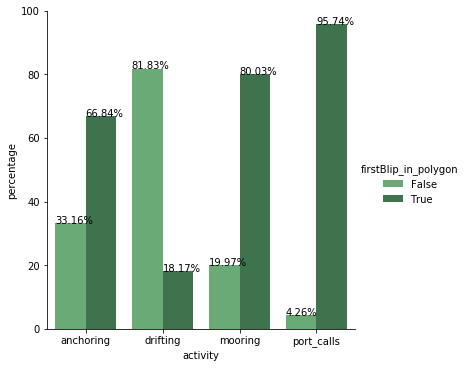

In [106]:
plot_precentage_in_polygon(is_in_polygon_df, 'firstBlip_in_polygon')

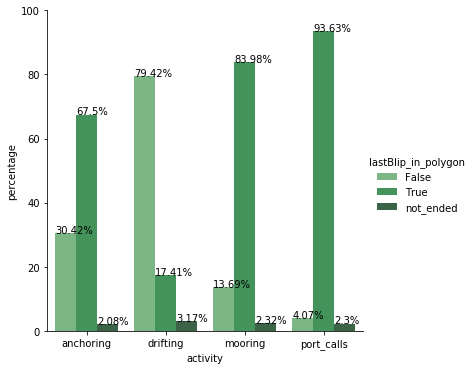

In [107]:
plot_precentage_in_polygon(is_in_polygon_df, 'lastBlip_in_polygon')